# AutoEncoder Lineal (PCA)

Los AutoEncoders son una familia de redes neuronales que pueden considerarse no supervisadas. Una versión sencilla del AutoEncoder es tomar funciones lineales. Es decir, sin funciones sigmoidales o de otro estilo ni en la capa oculta ni en la de salida. Asimismo, tampoco cuentan con bias.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from scipy.linalg import eig

### Preparación de los datos

Para esta tarea, tomaremos datos de imágenes. Estas contienen digitos escritos a manos orientados a la tarea de reconocimiento óptico.

In [2]:
# Carga de los datos
data = load_digits()

Una descripción de los datos se imprime a continuación:

In [3]:
#Descripción de dataset
print(data.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each bloc

Separaremos los datos en los vectores de entrenamiento (vectores en $\mathbb{R}^{64}$ que representan matrices de $8\times ($), así como las clases (los digitos a que cada imagen corresponde). Sin embargo, para en este caso sólo utilizaremos los vectores $X$, pues, como se ha apuntado, los AutoEncoders son redes no supervisadas.

In [4]:
#Vectores X
X = data.data[:200]
#Clases Y
Y = data.target[:200]

Definiremos una función que nos permita visualizar los datos como imágenes:

In [5]:
#Función de visualización
def plot_digits(IMG):
    fig=plt.figure(figsize=(3, 3))
    for i in range(1, 10):
        fig.add_subplot(3, 3, i)
        plt.imshow(IMG[i].reshape(8,8), cmap='Greys')
    plt.show()

Y visualizaremos los digitos en forma de imágenes. Visualizaremos únicamente 9 de estos ejemplos:

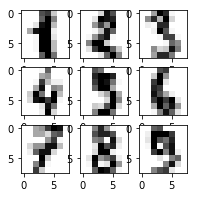

In [6]:
#Ploteo de las imágenes
plot_digits(X)

### PCA

Un AutoEncoder Lineal (con una capa oculta y sin bias) es equivalente a lo que se conoce como el método de Principal Component Analysis (PCA). En este caso, uno de los primeros pasos a determinar es normalizar los datos con respecto a la norma de los  datos. Esto es, cada entrada de un vector será de la forma:

$$x_i^\mu = x_i - \frac{1}{N}\sum_{k=1}^N x_{k,i}$$

Donde $N$ es el número de ejemplos, $x_i$ es la entrada $i$-ésima de un vector ejemplo, y $x_{k,i}$ es la entrada $i$-ésima del $k$-ésimo ejemplo.

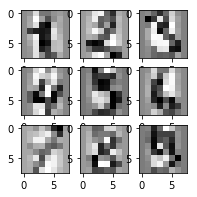

In [7]:
#Media
mu = X.sum(0)/200
#Varianza
#sigma = ((X-mu)**2+1e-100).sum(0)/200

#Normalización de los vectores
X_norm = X-mu #/sigma

#Ploteo de las imágenes normalizadas
plot_digits(X_norm)

En el caso de un AutoEncoder lineal, tenemos que se define una función determinada por las siguientes capas:

* Capa oculta: $$h = Wx$$
* Capa de salida: $$\hat{x} = Uh$$

En este caso, esperamos que se cumpla: $$U = W^{-1}$$ De tal forma que la capa de salida sea una reconstrucción de la entrada.

El objetivo es que la capa oculta tenga una dimensión menor, la cual permita visualizar los datos. Asi, este método (PCA o AutoEncoder lineal) se utiliza comúnmente como un método de reducción de la dimensionalidad. La función que buscamos minimizar está dada por: $$R(\theta) = \frac{1}{2N} \sum_x ||\hat{x} - x||^2$$

Minimizar esta función, equivale a tomar los eigen vectores de la matriz $X^TX$ con mayor varianza (eigenvalores más grandes o, equivalentemente, valores singulares más grandes).

Así descomponeremos a la matriz en sus valores singulares:

$$ X \approx USV$$

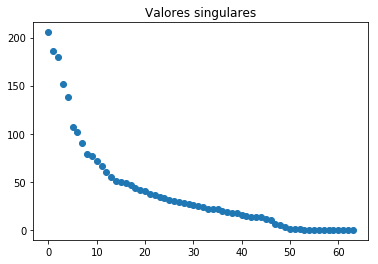

In [8]:
#SVD
U, S, V = np.linalg.svd(X_norm, full_matrices=False)

#Visualización de valores singulares
plt.plot(S, 'o')
plt.title('Valores singulares')
plt.show()

Para obtener la matriz de pesos en la capa de entrada (la función de reducción de dimensionalidad) tomaremos los dos (para obtener una visualización en dos dimensiones) eigenvectores de $V$ con eigenvalores más grandes.

In [9]:
#Capa oculta
W = V[:2]

Podemos, entonces aplicar esta matriz a los datos, para obtener la capa oculta. Esta capa oculta será de especial interés, pues representa una versión de los datos en un espacio de menor dimensión. Es precisamente esta capa oculta la que buscamos obtener en el método de PCA.

(200, 2)


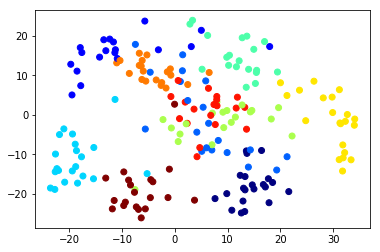

In [10]:
#Capa oculta del autoencoder
h = np.dot(X,W.T)
print(h.shape)

#Visualización de la capa oculta
plt.scatter(h[:,0], h[:,1], c=Y, cmap='jet')
plt.show()

Como podemos ver, los datos muestran una buena separabilidad en el espacio de dos dimensiones. Muchas veces, el objetivo de este método es obtener esta representación, por lo que no se sigue o no se calcula la capa de salida. En este caso, pdremos calcular la capa de salida para visualizar cómo la red reconstruye los datos.

En este caso, los pesos de salida están determinados por $W^T$, puesto que $V$ define una base ortonormal, tenemos que $W^{-1} = W^T$.

In [11]:
#Reconstrucción de los datos
X_rec = np.dot(h, W)

#error de la reconstrucción
print('Error:', np.linalg.norm(X_rec - X) )

Error: 834.7876893797696


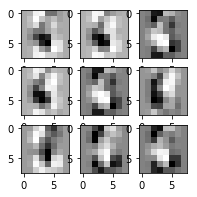

In [12]:
#Visualización de la recontrucción
plot_digits(X_rec)

Una nota importante es que los vectores de la capa oculta $Wx$ son equivalentes a los que se encuentran en la matriz $U$. Así, en lugar de tomar los vectores de $V$ para construir la transformación $W$, podemos tomar la matriz $U$ de la descomposición y y visualizarlos directamente en 2 dimensiones. Esta matriz, entonces, guarda los compoentes principales.

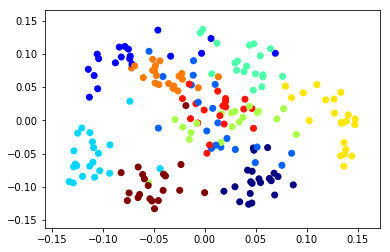

In [13]:
#Se toman los 2 PC
U = U[:, :2]

#Visualización
plt.scatter(U[:,0], U[:,1], c=Y, cmap='jet')
plt.show()

La ventaja de obtener la transformación $W$ es que podemos ver cómo es que el método reconstruye los vectores  de entrada con $W^T$. 

Ahora, podemos definir  una función para obtener esta tranformación, determinando las dimensiones de la capa oculta como un hiperparámetro.

In [14]:
#función de PCA
def pca(vecs, dims=2):
    #SVD
    U, S, V = np.linalg.svd(vecs, full_matrices=False)
    #Transformación
    T = V[:dims]
    return T

Así, podemos ver cómo el métod es capas de reconstruir las imágenes de entrada y cómo las dimensiones intermedias afectan esta reconstrucción.

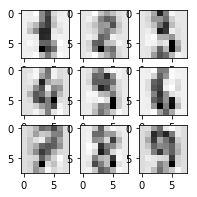

In [16]:
#Tranformación con 16 dimensiones
T = pca(X_norm,dims=16)

#Reducción a 16 dimensiones
X16 = np.dot(X,T.T)

#Reconstrucción y visualización
plot_digits(np.dot(X16,T))

#### PCA desde SKLearn

In [17]:
from sklearn.decomposition import PCA

In [18]:
Xsk = PCA(n_components=2).fit_transform(X)

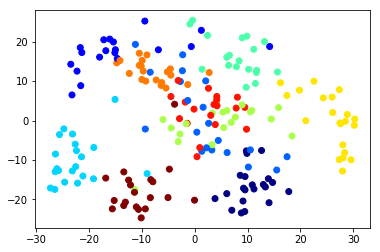

In [19]:
plt.scatter(Xsk[:,0], Xsk[:,1], c=Y, cmap='jet')
plt.show()

# Denoising AutoEncoder

Un caso distinto es el denoising AutoEncoder: su objetivo es reconstruir los datos a partir de una entrada ruidosa. Así, este tipo de redes se utiliza para obtener datos limpios a partir de datos ruidoso. Como ejemplo, podemos tomar la reconstrucción de las imágenes hecha por  un AutoEncoder lineal; esta reconstrucción no es precisa, por lo que puede considerarse como ruidosa. Entonces, el objetivo es conseguir una imágen más 'limpia'.

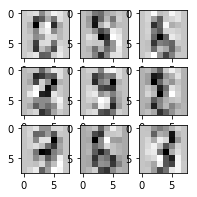

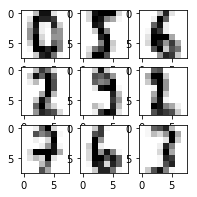

In [20]:
from sklearn.model_selection import train_test_split

#Tranformación
R = pca(X_norm,dims=10)
#Datos ruidosos (reconstruidos)
Xnoise = np.dot(np.dot(X,R.T), R)

#Separación en datos de entrenamiento y evaluación
X_train, X_test, Y_train, Y_test = train_test_split(Xnoise,X, test_size=0.5)

#Visualización datos ruidoso
plot_digits(X_train)
#Visualización datos objetivo
plot_digits(Y_train)

En este caso, utilizaremos un algoritmo de retropropagación para obtener los pesos. En este caso, la función de riesgo está determinada por:

$$R(\theta) = \frac{1}{2N} \sum_x ||\hat{x^{\rho}} - x||^2$$

En este caso, $x^{\rho}$ es una imagen con ruido y $\hat{x^{\rho}}$ es una reconstrucción que busca eliminar el ruido. Así, el objetivo es que esta reconstrucción sea lo más similar posible a los datos sin ruido $x$. 

In [21]:
np.random.seed(0)

#HIPERPARÁMETROS
#Dimensiones entrada y salida
d = X_train.shape[1]
#Número de dimensiones
h_dim = 300
#Rango de aprendizaje
l = 1e-5
#Regularización
reg = 0.5
#Número máximo de iteraciones
max_it = 1000

#Inicialización de parámetros de la red
w1 = np.random.rand(d,h_dim)/np.sqrt(d)
b1 = np.ones(h_dim)
w2 = np.random.rand(h_dim,d)/np.sqrt(h_dim)
b2 = np.ones(d)

stop = False #Condición de paro
for t in range(0, max_it):
    error = 0.0
    for x,y in zip(X_train,Y_train):
        #FORWARD
        #Pre-activación capa oculta
        a = np.dot(x,w1) + b1
        #Activación capa oculta
        h = a 
        #Pre-activación capa de salida
        out = np.dot(h,w2) + b2
        f = out
        
        #BACKPROP
        #Variable de capa de salida
        d_out = f-y
        
        #Variable de capa oculta
        d_h = np.dot(d_out,w2.T)

        #Derivada sobre w2
        dw2 = np.outer(h,d_out)
        #Derivada sobre b2
        db2 = d_out
        #Derivada sobre w1   
        dw1 = np.outer(x,d_h)
        #Derivada sobre b1
        db1 = d_h
        #Derivada regularización
        dw2 += reg*w2
        dw1 += reg*w1

        #Actualización de pesos
        w2 -= l*dw2
        w1 -= l*dw1
        b1 -= l*db1
        b2 -= l*db2

        #Cálculo de errores cometidos
        error += np.linalg.norm(d_out)**2
    
    #print(error)
    if t%100 == 0: 
        print('Época', t, '\t Error', error/len(X_train) )

    #Aumenta la iteración
    t += 1
    #Condición de paro
    if t == max_it:
        stop = True
        print('Época', t, '\t Error', error/len(X_train) )

Época 0 	 Error 8053.839535625678
Época 100 	 Error 240.0756646379795
Época 200 	 Error 232.08215459105318
Época 300 	 Error 227.66978737692506
Época 400 	 Error 225.59131673674074
Época 500 	 Error 224.5651078595439
Época 600 	 Error 223.97349016585773
Época 700 	 Error 223.5795699940909
Época 800 	 Error 223.2918092541166
Época 900 	 Error 223.07003182346978
Época 1000 	 Error 222.89511300633788


Una vez estimados los parámetros de la red, podemos ver qué tanto es capaz de quitar el ruido de los datos de entrenamiento.

Noise


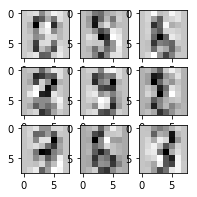

Denoise


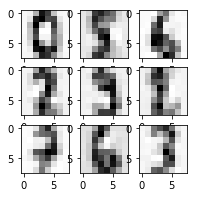

Original


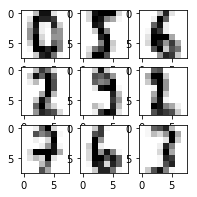

In [22]:
#Cálculo de la red datos: de entrenamiento
h_e = np.tanh(np.dot(X_train,w1) + b1)
out_e = np.dot(h_e,w2) + b2

#Visualización de los datos
print('Noise')
plot_digits(X_train)
print('Denoise')
plot_digits(out_e)
print('Original')
plot_digits(Y_train)

Finalmente, podemos evaluar el AutoEncoder en los datos de evaluación, y así poder determinar su poder de generalización a partir del cálculo del error cuadrático.

Noise


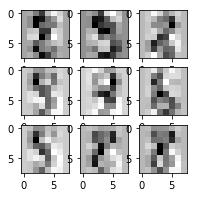

Denoise


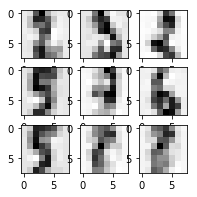

Original


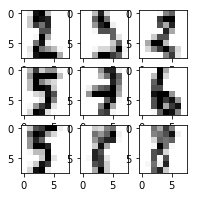

In [23]:
#Cálculo de la red datos: de evaluación
h_test = np.tanh(np.dot(X_test,w1) + b1)
out_test = np.dot(h_test,w2) + b2

#Visualización
print('Noise')
plot_digits(X_test)
print('Denoise')
plot_digits(out_test)
print('Original')
plot_digits(Y_test)

In [24]:
print('Test error:', (np.linalg.norm(out_test - Y_test)**2)/len(X_test) )

Test error: 1847.1973137469329
